In [1]:
#import important libararies
import pandas as pd

In [2]:
from google.colab import files
uploaded =files.upload()

Saving car data.csv to car data.csv


In [3]:
# Load the dataset
data = pd.read_csv('/content/car data.csv')

**# Data preprocessing (cleaning, encoding, scaling)**

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [8]:
data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [11]:
# Perform one-hot encoding for the 'fuel_type','Selling_type','Transmission',Car_Name column chahe categorical values to numerical input variables
data = pd.get_dummies(data, columns=['Selling_type','Transmission'])
data = pd.get_dummies(data, columns=['Fuel_Type','Car_Name'])


In [12]:
# Split data into features and target variable
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']


In [13]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
model = LinearRegression()

In [15]:
# Create and train your model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1.103843003720237
Mean Squared Error: 2.2878245326833606
R-squared: 0.9006830267029606


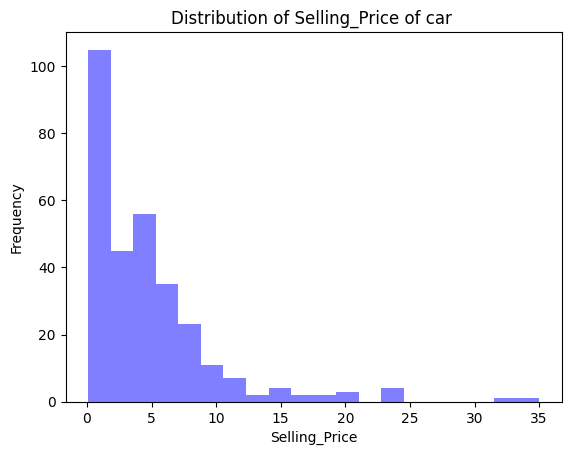

In [19]:
import matplotlib.pyplot as plt

# Plot a histogram of car prices
plt.hist(data['Selling_Price'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Selling_Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling_Price of car ')
plt.show()


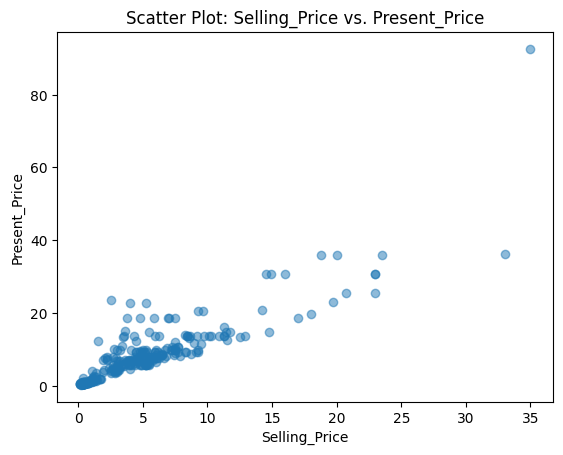

In [20]:
# Example scatter plot of 'Selling_Price' vs. 'Present_Price'
plt.scatter(data['Selling_Price'], data['Present_Price'], alpha=0.5)
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')
plt.title('Scatter Plot: Selling_Price vs. Present_Price')
plt.show()
